# Experimento 7 : Test te results

## Load the CBNs and show his topologies

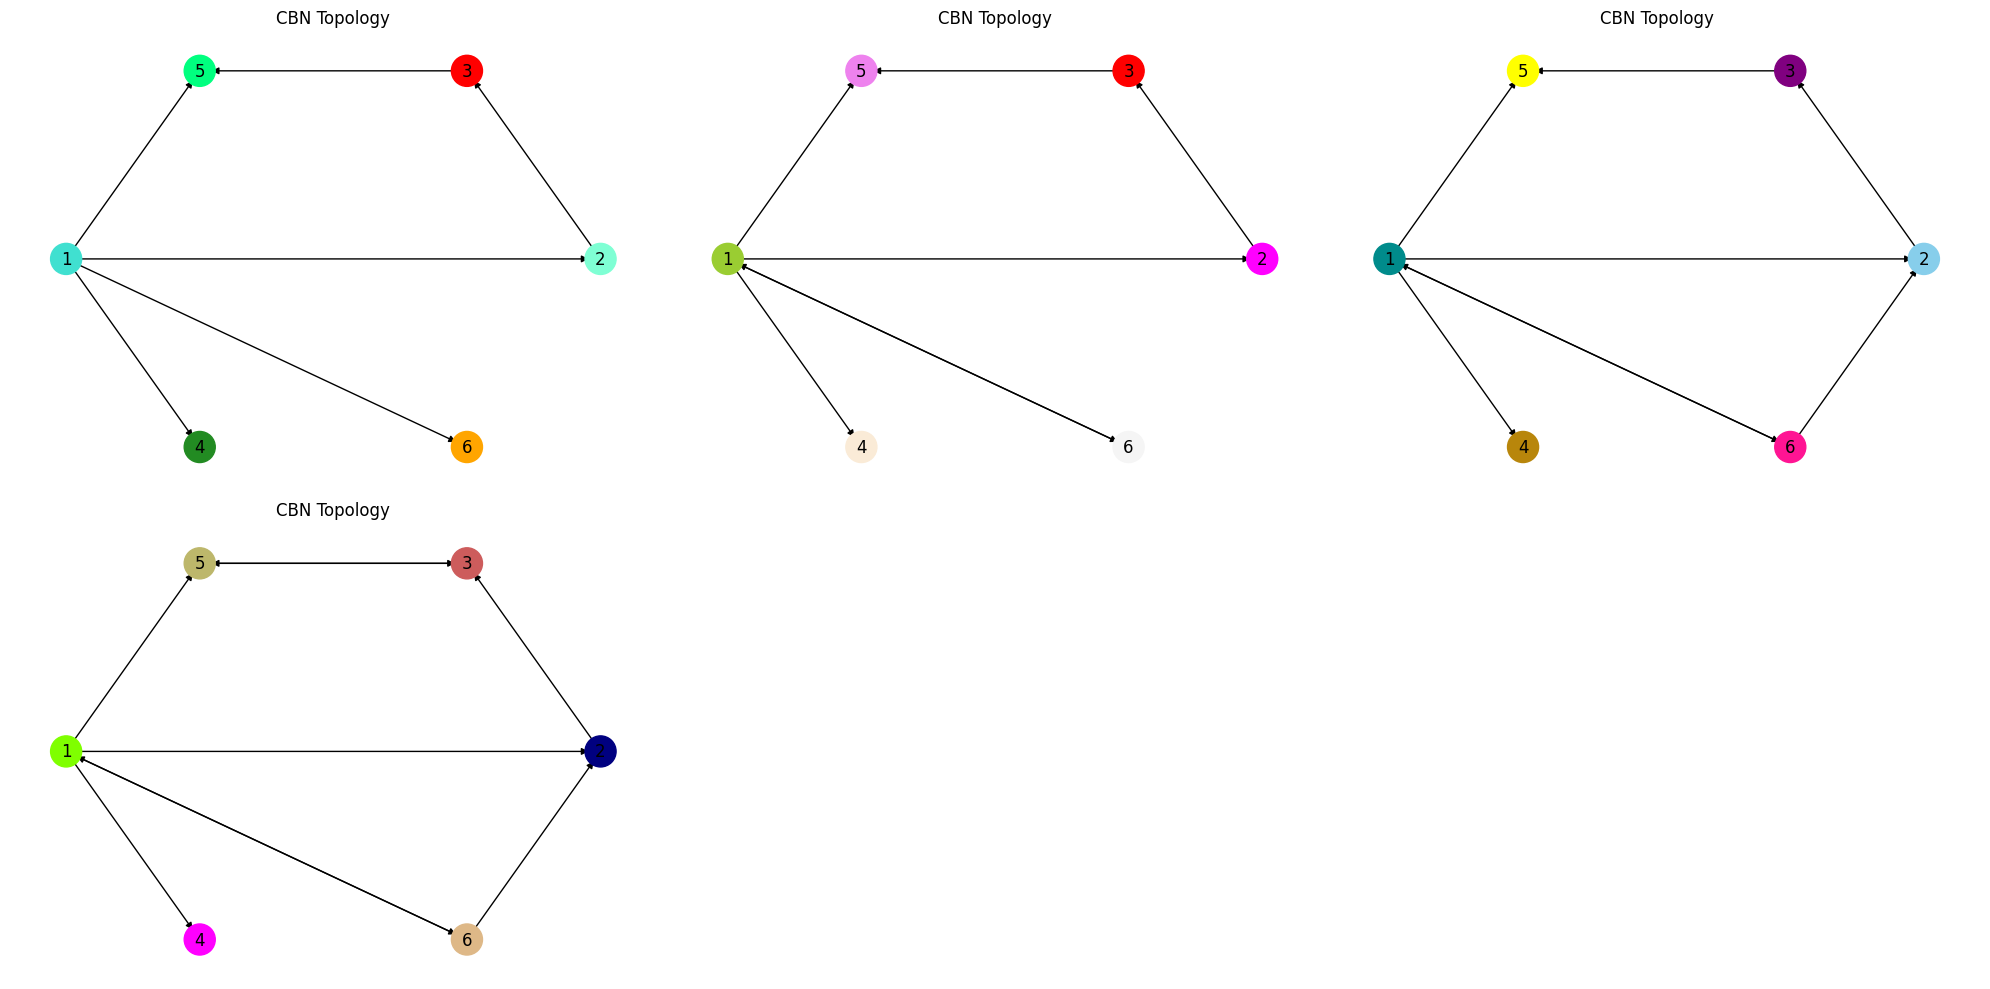

In [6]:
import pickle
import os
import matplotlib.pyplot as plt

# Define el segundo número en la ruta del archivo pickle
second_number = 6  # Cambia esto según sea necesario

# Ruta base sin el número cambiante
base_path_cbn = f'outputs/exp7_data_3_9_10/pkl_cbn/cbn_5_{second_number}_'

# Número inicial y rango máximo
start_number = second_number
max_number = 2 * start_number

# Lista de archivos pickle existentes
pickle_files = [f"{base_path_cbn}{i}.pkl" for i in range(start_number, max_number + 1) if os.path.exists(f"{base_path_cbn}{i}.pkl")]

# Número total de gráficos
total_graphs = len(pickle_files)

# Configuración de subplots en múltiples filas y columnas
cols = 3
rows = (total_graphs + cols - 1) // cols  # Calcula el número de filas necesario

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))

# Aplanar la matriz de ejes si hay más de una fila
if rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Iterador para cargar y mostrar las topologías
for path_cbn, ax in zip(pickle_files, axes):
    with open(path_cbn, 'rb') as file:
        o_cbn = pickle.load(file)
    
    # Mostrar la información de CBN en el subplot correspondiente
    o_cbn.plot_topology(ax=ax)  # Asegúrate de que plot_topology acepte un parámetro ax

# Eliminar ejes vacíos si hay menos gráficos que espacios de subplots
for ax in axes[total_graphs:]:
    fig.delaxes(ax)

# Ajustar el layout y mostrar todas las gráficas juntas
plt.tight_layout()
plt.show()


In [7]:
# Iterador para cargar y mostrar las topologías
for path_cbn, ax in zip(pickle_files, axes):
    with open(path_cbn, 'rb') as file:
        o_cbn = pickle.load(file)
        # o_cbn.show_description()
        print(o_cbn.o_global_topology.get_edges())

[(2, 3), (3, 5), (1, 2), (1, 4), (1, 6), (1, 5)]
[(2, 3), (3, 5), (1, 2), (1, 4), (1, 6), (1, 5), (6, 1)]
[(2, 3), (3, 5), (1, 2), (1, 4), (1, 6), (1, 5), (6, 1), (6, 2)]
[(2, 3), (3, 5), (1, 2), (1, 4), (1, 6), (1, 5), (6, 1), (6, 2), (5, 3)]


In [8]:
import contextlib
import io

# Crear la carpeta de descripción si no existe
description_folder = 'description'
os.makedirs(description_folder, exist_ok=True)

# Función para extraer el índice del archivo pickle
def extract_index(file_path):
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    return file_name.split('_')[-1]

# Iterador para cargar y guardar las descripciones
for path_cbn in pickle_files:
    idx = extract_index(path_cbn)
    
    with open(path_cbn, 'rb') as file:
        o_cbn = pickle.load(file)
    
    # Capturar la salida de o_cbn.show_description()
    description = io.StringIO()
    with contextlib.redirect_stdout(description):
        o_cbn.show_description()
    
    # Guardar la descripción en un archivo de texto
    description_file_path = os.path.join(description_folder, f'description_{idx}.txt')
    with open(description_file_path, 'w') as desc_file:
        desc_file.write(description.getvalue())

print("Descripciones guardadas en la carpeta 'description'.")

Descripciones guardadas en la carpeta 'description'.


In [10]:
# print("Generated Global Topology")
N_LOCAL_NETWORKS_MIN=3
N_LOCAL_NETWORKS_MAX=9

for n_local_networks in range(N_LOCAL_NETWORKS_MIN, N_LOCAL_NETWORKS_MAX + 1):
    v_begin_edges = n_local_networks
    v_end_edges = n_local_networks + (n_local_networks // 2) + 1
    l_edges = []
    for n_edges in range(v_begin_edges, v_end_edges):
        l_edges.append(n_edges)
    print(l_edges)

[3, 4]
[4, 5, 6]
[5, 6, 7]
[6, 7, 8, 9]
[7, 8, 9, 10]
[8, 9, 10, 11, 12]
[9, 10, 11, 12, 13]
